In [15]:
#disable-scientific-notation-in-r
options(scipen=999)

In [16]:
library(caret)

In [17]:
# ??createDataPartition
# ?train
# ?expand.grid
# ??varImp showcases variable importance of the variables used in the final model.
# ??defaultSummary

#use the read.csv function to read the data from a CSV file
#drl_cpi_prr_vr_housingstock_0.csv
#into a data frame
df <- read.csv(file.choose(), header=TRUE)

In [18]:
# Data Loading and Splitting
# 80% train data
trainIndex <- createDataPartition(df$Rent, p = .8,
                                  list = FALSE,
                                  times = 1)

head(trainIndex)

Resample1
1
2
3
6
7
9


In [19]:
dfTrain <- df[ trainIndex,]
dfTest  <- df[-trainIndex,]

In [20]:
head(dfTrain)

,Year,Location,PropertyType,NumberofBedrooms,VacancyRate,CPI,Price.Rent.Ratio,HousingStock,Rent
1,2008,"Artane, Dublin 5",Apartment,All bedrooms,0,47.33,123.4,1960000,1265.90
2,2008,"Artane, Dublin 5",Terrace house,All bedrooms,0,47.33,123.4,1960000,1273.52
3,2008,"Artane, Dublin 5",Semi detached house,All bedrooms,0,47.33,123.4,1960000,1347.52
6,2008,"Aungier Street, Dublin 2",Apartment,1 to 2 bed,0,47.33,123.4,1960000,1142.27
7,2008,"Aungier Street, Dublin 2",Apartment,All bedrooms,0,47.33,123.4,1960000,1142.27
9,2008,"Balbriggan, Dublin",Terrace house,All bedrooms,0,47.33,123.4,1960000,1074.81


In [21]:
head(dfTest)

,Year,Location,PropertyType,NumberofBedrooms,VacancyRate,CPI,Price.Rent.Ratio,HousingStock,Rent
4,2008,"Ashtown, Dublin 15",Apartment,1 to 3 bed,0,47.33,123.4,1960000,1243.43
5,2008,"Ashtown, Dublin 15",Apartment,All bedrooms,0,47.33,123.4,1960000,1243.43
8,2008,"Aungier Street, Dublin 2",Apartment,1 to 3 bed,0,47.33,123.4,1960000,1142.27
12,2008,"Baldoyle, Dublin 13",Apartment,All bedrooms,0,47.33,123.4,1960000,1200.22
15,2008,"Ballinteer, Dublin 16",Apartment,1 to 3 bed,0,47.33,123.4,1960000,1364.00
16,2008,"Ballinteer, Dublin 16",Apartment,All bedrooms,0,47.33,123.4,1960000,1364.00


In [22]:
# Model Building and Tuning
lmFit<-train(Rent~., data = dfTrain, method = "lm")
summary(lmFit)

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdat


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-414.10  -46.88   -3.33   45.82  707.98 

Coefficients:
                                              Estimate     Std. Error t value
(Intercept)                             -109798.038649   21722.748147  -5.055
Year                                         60.299217      12.538879   4.809
`LocationArtane, Dublin 5`                  -11.467665      45.747116  -0.251
`LocationAshtown, Dublin 15`                 37.577694      54.574645   0.689
`LocationAungier Street, Dublin 2`            8.826679      49.708163   0.178
`LocationBalbriggan, Dublin`               -264.224927      46.743998  -5.653
`LocationBaldoyle, Dublin 13`                -0.697268      46.281832  -0.015
`LocationBalgriffin, Dublin 13`              97.108165      50.172566   1.935
`LocationBallinteer, Dublin 16`             164.407508      47.777873   3.441
`LocationBallsbridge, Dublin 4`             479.505457      44.19

In [24]:
ctrl<-trainControl(method = "cv",number = 10)

lmCVFit<-train(Rent ~ ., data = df, method = "lm", trControl = ctrl, metric="Rsquared")

summary(lmCVFit)

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-422.54  -47.91   -3.56   45.28  733.04 

Coefficients:
                                              Estimate     Std. Error t value
(Intercept)                             -117734.836547   19345.709871  -6.086
Year                                         64.843416      11.169601   5.805
`LocationArtane, Dublin 5`                  -16.367457      42.184208  -0.388
`LocationAshtown, Dublin 15`                 45.071229      48.025647   0.938
`LocationAungier Street, Dublin 2`           12.356681      44.977664   0.275
`LocationBalbriggan, Dublin`               -273.549874      42.351051  -6.459
`LocationBaldoyle, Dublin 13`                 0.420300      42.030385   0.010
`LocationBalgriffin, Dublin 13`              78.352284      45.799118   1.711
`LocationBallinteer, Dublin 16`             169.937276      43.059935   3.947
`LocationBallsbridge, Dublin 4`             466.554342      40.49

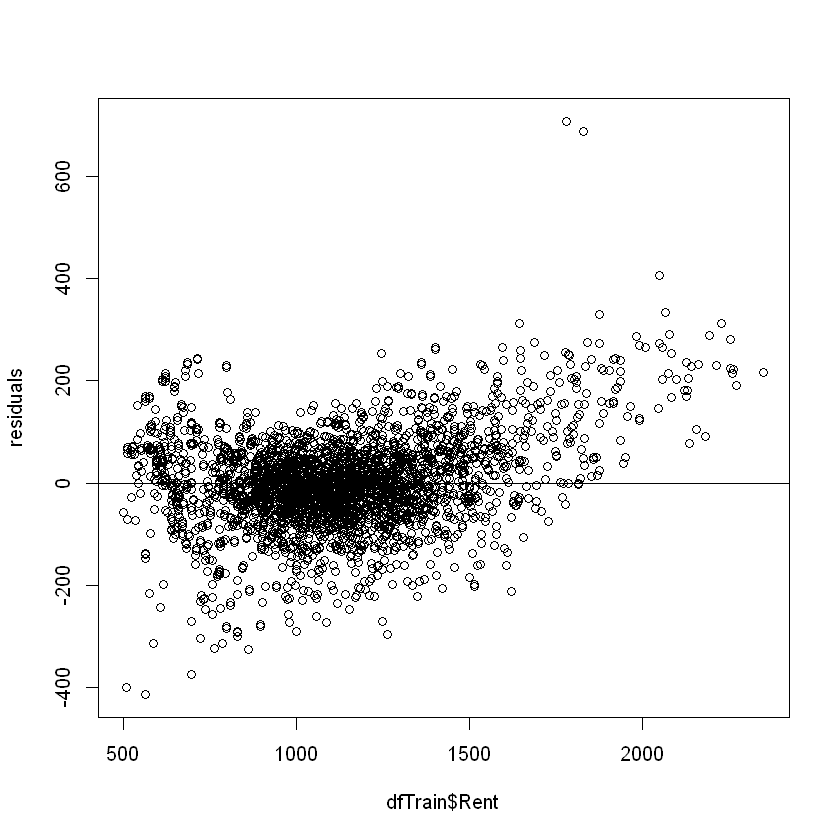

In [23]:
# Model Diagnostics and Scoring
residuals<-resid(lmFit)

predictedValues<-predict(lmFit)

plot(dfTrain$Rent,residuals)

abline(0,0)

lm variable importance

  only 20 most important variables shown (out of 178)

                                       Overall
`PropertyTypeOther flats`               100.00
`PropertyTypeDetached house`             74.61
`PropertyTypeSemi detached house`        61.13
`PropertyTypeTerrace house`              37.58
Price.Rent.Ratio                         29.51
`LocationGrand Canal Square, Dublin 2`   22.45
`LocationHanover Quay, Dublin 2`         22.29
`LocationGrand Canal Dock, Dublin 2`     17.57
`LocationDublin 4`                       16.31
`LocationFoxrock, Dublin 18`             16.13
`LocationBallsbridge, Dublin 4`          15.98
`LocationSandymount, Dublin 4`           13.66
`LocationGoatstown, Dublin 14`           13.14
`LocationSpencer Dock, Dublin 1`         12.67
`LocationDublin 2`                       11.46
`LocationDonnybrook, Dublin 4`           11.44
`LocationClonskeagh, Dublin 14`          10.99
`LocationMount Merrion, Dublin`          10.82
`LocationBooterstown, Dublin

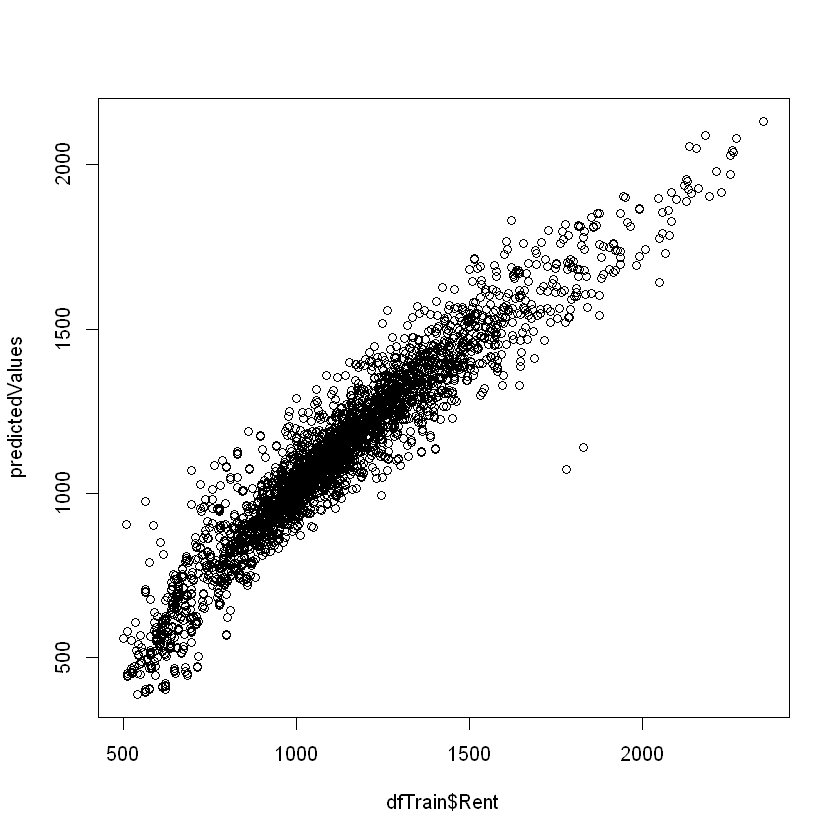

ERROR: Error in predict.train(lmFit, val): object 'val' not found


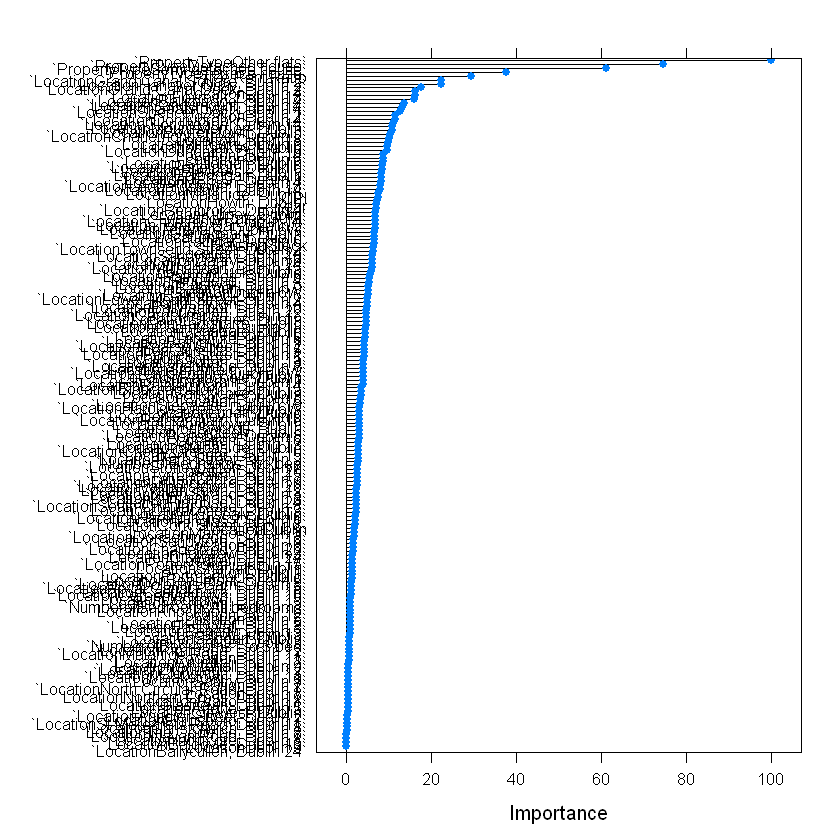

In [25]:
plot(dfTrain$Rent,predictedValues)

varImp(lmFit)

plot(varImp(lmFit))

predictedVal<-predict(lmFit,val)

In [26]:
#
modelvalues<-data.frame(obs = dfTrain$Rent, pred=predictedValues)

defaultSummary(modelvalues)

RMSE   Rsquared        MAE 
90.0477216  0.9045622 64.7680105